<a href="https://colab.research.google.com/github/ucfilho/thesis_advices/blob/master/Surfactante_ANN_dez_16_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
%matplotlib inline

In [0]:
NOME='Ensaios_Biossurfactante_Novo.xlsx'

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
# funcao retorna os dados a forma original
def Descodifica(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [6]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
#getLocalFiles()
file=getLocalFiles()

Saving Ensaios_Biossurfactante_Novo.xlsx to Ensaios_Biossurfactante_Novo.xlsx


In [0]:
DAT = pd.read_excel(NOME, sheet_name="Extração bios")

In [0]:
# separa as colunas de interesse
Index=range(1,7)
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()

In [0]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [0]:
# separa os dados em treino e teste
Id=range(23)
train=DAT.iloc[Id,:] 
test=DAT.drop(train.index)
Col_Indep=['Oleo','NH4NO3',  'KH2PO4' , 'Inóculo']

In [0]:
# obtem as variaveis independentes (treino e teste)
x_train=train[Col_Indep]
x_test=test[Col_Indep]
X_OLD=DAT_OLD[Col_Indep]

In [0]:
# obtem as variaveis dependentes (treino e teste)
Index=[ 'Surfactante']
y_train=train[Index]
y_test=test[Index]
Y_OLD=DAT_OLD[Index]

In [0]:
# define a rede neural 
N_Hidden=10
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(N_Hidden), 
                    random_state=1)

In [14]:
# treina a rede neural
clf.fit(x_train, y_train)
print("--------------")

--------------


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [0]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [17]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
y_test=Original(y_test,Y_OLD)
y_train=Original(y_train,Y_OLD)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


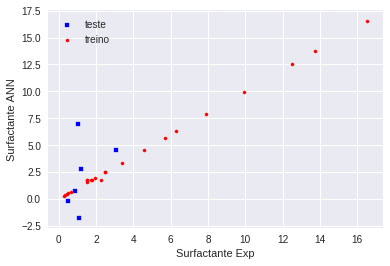

In [18]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test.values,y_calc_test.values, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train.values,y_calc_train.values, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Surfactante ANN')
plt.xlabel('Surfactante Exp')
plt.show()

In [0]:
def function(x):
  global clf
  x=x.reshape((1, 4))
  df = pd.DataFrame(x)
  Y=clf.predict(df)
  fun=Y*(-1)
  return fun


In [0]:
bounds = [(-1, 1),(-1, 1),(-1, 1),(-1, 1)]
OLD=Y_OLD
DE_resp = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)
Condicoes=pd.DataFrame(DE_resp.x.reshape(1, 4))

In [21]:
col_names=list(X_OLD)
Condicoes.columns = col_names
Resp=Original(Condicoes,X_OLD)
print(Resp)

        Oleo  NH4NO3  KH2PO4  Inóculo
0  57.760064     1.5    0.05      3.0


In [22]:
print(Resp)
Otimo=DE_resp.fun*(-1)
col_names=list(y_train)
Otimo=pd.DataFrame(Otimo)
Otimo.columns = col_names
Otimo=Original(Otimo,Y_OLD)
print(Otimo)

        Oleo  NH4NO3  KH2PO4  Inóculo
0  57.760064     1.5    0.05      3.0
   Surfactante
0    16.566067
